In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fitsio 
from glob import glob
%matplotlib inline

In [2]:
fdir = '/home/rodrigo/Documentos/maestria/ultimo_año/datos_boss_dr9/BOSSLyaDR9_cat.fits'

In [3]:
DM = fitsio.FITS(fdir)
#DM

In [4]:
fm = fitsio.read(fdir,'BOSSLyaDR9_cat')
fm.dtype.descr

[('SDSS_NAME', '|S18'),
 ('RA', '>f4'),
 ('DEC', '>f4'),
 ('THING_ID', '>i4'),
 ('PLATE', '>i4'),
 ('MJD', '>i4'),
 ('FIBERID', '>i4'),
 ('Z_VI', '>f4'),
 ('Z_PIPE', '>f4'),
 ('SNR', '>f4'),
 ('SNR_LYAF', '>f4'),
 ('CHISQ_CONT', '>f4'),
 ('CONT_FLAG', '>i4'),
 ('CONT_TEMPLATE', '|S8'),
 ('Z_DLA', '>f4'),
 ('LOG_NHI', '>f4')]

In [5]:
for i in range(len(fm['FIBERID'])): 
    if fm['PLATE'][i] == 3586:
        if fm['MJD'][i] == 55181:
            if fm['FIBERID'][i] == 890:
                print(i)
                print(fm['Z_VI'][i])
                print(fm['Z_PIPE'][i])
                break

1074
2.196
2.1945682


In [6]:
plates = []
mjds = [] # MJD (Modified Julian date of observation)
fibers = []
zss = []
prueba = []
for i in range(len(fm['Z_VI'])):
    if 2.2 <= fm['Z_VI'][i] < 2.4 :
        plates.append(fm['PLATE'][i])
        mjds.append(fm['MJD'][i])
        fibers.append(fm['FIBERID'][i])
        zss.append(fm['Z_VI'][i])
        prueba.append('BOSSLyaDR9_spectra/{}/speclya-{}-{}-{}.fits'.format(fm['PLATE'][i],fm['PLATE'][i],fm['MJD'][i],str(fm['FIBERID'][i]).zfill(4)))

In [7]:
print('long. plates = {} \nlong. mjds = {} \nlong.fibers = {}'.format(len(plates),len(mjds),len(fibers)))

long. plates = 16693 
long. mjds = 16693 
long.fibers = 16693


In [8]:
wave_rf = []
continuos = []
flujos = []
for i in range(100):
    specfile = '/home/rodrigo/Documentos/maestria/ultimo_año/datos_boss_dr9/{}'.format(prueba[i])
    sp = fitsio.read(specfile)
    wave = []
    continuo = []
    flujo = []
    for j in range(len(sp['FLUX'])):
        wave.append(10**(sp['LOGLAM'][j]))
        continuo.append(sp['CONT'][j])
        flujo.append(sp['FLUX'][j])
    wave_rf.append(wave/(1+zss[i]))
    continuos.append(continuo)
    flujos.append(flujo)
    #print(specfile)

qsolines = np.array([1216,1546,1906,2800,4853,4960,5008])

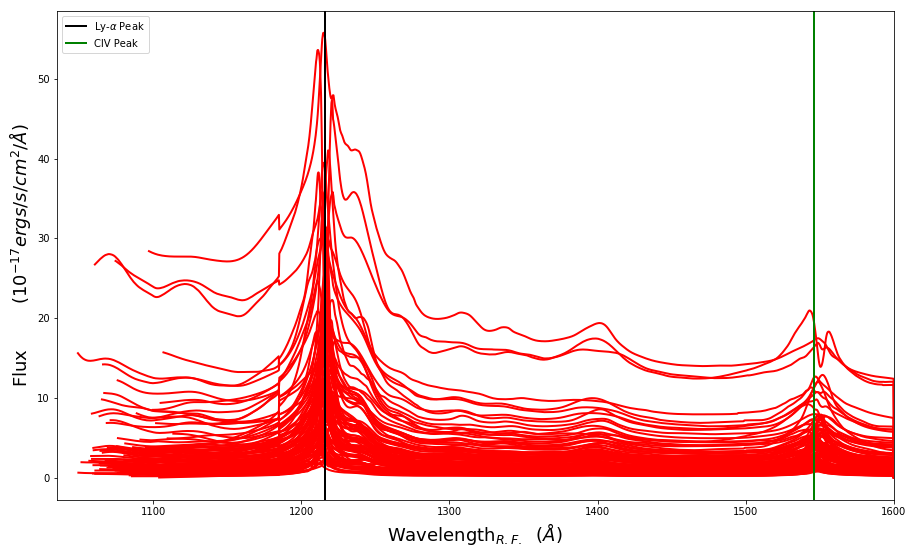

In [61]:
plt.figure(figsize=(15,9))
for k in range(len(wave_rf)):
    plt.plot(wave_rf[k],continuos[k], color='r',linewidth=2.0)
    #plt.plot(wave_rf[k],flujos[k],color='b',linewidth=2.0)
plt.axvline(1216, color = 'k',label=('Ly-$\\alpha$ Peak'),linewidth=2.0)
plt.axvline(1546, color = 'g',label=('CIV Peak'),linewidth=2.0)
#plt.axvline(1049, color = 'g',label=('CIV Peak'),linewidth=2.0)
plt.xlim(1035,1600)
#plt.ylim(-5,12)
plt.xlabel('Wavelength$_{R.F.}$  ($\AA$)',fontsize = 18)
plt.ylabel('Flux        ($10^{-17} ergs/s/cm^{2}/\AA$)',fontsize = 18)
plt.legend()

$\textbf{Here, I begin make the normalization.}$

In [10]:
lmin=1216.0
lmax=1546.0

integral = []
continuo_nor = []
for i in range(len(wave_rf)):
    sum1=0
    sum2=0
    flag=0
    for j in range(len(wave_rf[i])):
        if lmin <= wave_rf[i][j] < lmax :
            sum1+=(continuos[i][j])*(wave_rf[i][j+1]-wave_rf[i][j])
        elif (wave_rf[i][j] > lmax):
            break
    integral.append(sum1)
    continuo_nor.append(continuos[i]/sum1)

In [11]:
print('The total integrals = {}'.format(len(integral)))

The total integrals = 100


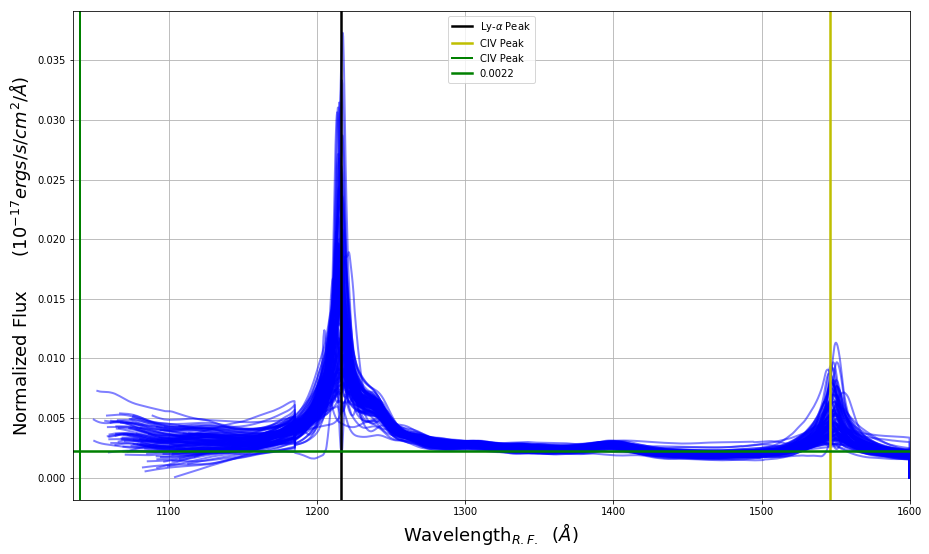

In [75]:
plt.figure(figsize=(15,9))
for k in range(len(wave_rf)):
    plt.plot(wave_rf[k],continuo_nor[k], color='b',linewidth=2.0,alpha=0.5)
plt.axvline(1216, color = 'k',label=('Ly-$\\alpha$ Peak'),linewidth=2.5)
plt.axvline(1546, color = 'y',label=('CIV Peak'),linewidth=2.5)
plt.axvline(1040, color = 'g',label=('CIV Peak'),linewidth=2.0)
#plt.axvline(1049,linewidth=2.5)
plt.axhline(0.0022, color = 'g',label=('0.0022'),linewidth=2.5)
plt.xlim(1035,1600)
#plt.ylim(-5,12)
plt.xlabel('Wavelength$_{R.F.}$  ($\AA$)',fontsize = 18)
plt.ylabel('Normalized Flux      ($10^{-17} ergs/s/cm^{2}/\AA$)',fontsize = 18)
plt.legend()
plt.grid()

$\textbf{Now, I will get the mean flux of the specta.}$

In [76]:
count = np.zeros(1600-1049+1)
mean= np.zeros(1600-1049+1)
sumflux = np.zeros(1600-1049+1)
for k in range(len(wave_rf)):
    for l in range(len(wave_rf[k])):
        if wave_rf[k][l] <= 1601:
            co = int(wave_rf[k][l])-1049
            count[co]+=1
            sumflux[co]+=continuo_nor[k][l]
            mean = sumflux/count

/home/rodrigo/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [77]:
xmean = np.linspace(1049,1600,1600-1049+1) 

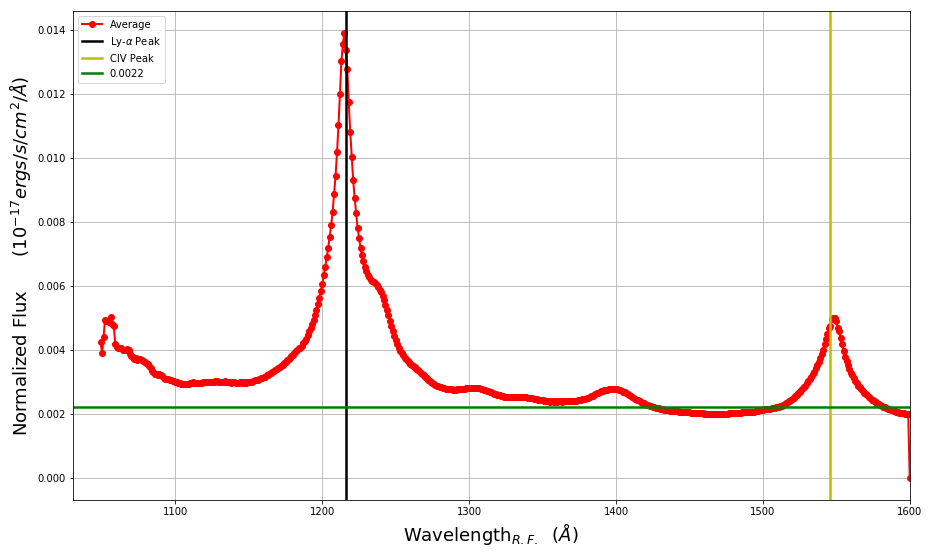

In [78]:
plt.figure(figsize=(15,9))
plt.plot(xmean,mean,'o-', color='r',label='Average',linewidth=2.0)
plt.axvline(1216, color = 'k',label=('Ly-$\\alpha$ Peak'),linewidth=2.5)
plt.axvline(1546, color = 'y',label=('CIV Peak'),linewidth=2.5)
#plt.axvline(1049,linewidth=2.5)
plt.axhline(0.0022, color = 'g',label=('0.0022'),linewidth=2.5)
plt.xlim(1030,1600)
#plt.ylim(-5,12)
plt.xlabel('Wavelength$_{R.F.}$  ($\AA$)',fontsize = 18)
plt.ylabel('Normalized Flux      ($10^{-17} ergs/s/cm^{2}/\AA$)',fontsize = 18)
plt.legend()
plt.grid()

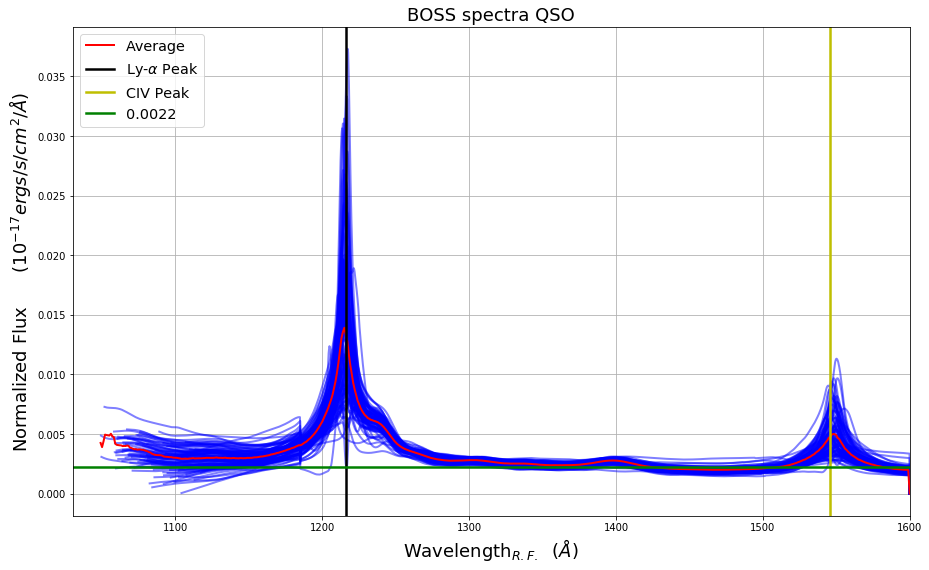

In [79]:
plt.figure(figsize=(15,9))
plt.title('BOSS spectra QSO',fontsize = 18)
for k in range(len(wave_rf)):
    plt.plot(wave_rf[k],continuo_nor[k], color='b',linewidth=2.0,alpha=0.5)
plt.plot(xmean,mean, color='r',label='Average',linewidth=2.0,alpha=1)
plt.axvline(1216, color = 'k',label=('Ly-$\\alpha$ Peak'),linewidth=2.5,alpha=1)
plt.axvline(1546, color = 'y',label=('CIV Peak'),linewidth=2.5,alpha=1)
#plt.axvline(1049,linewidth=2.5)
plt.axhline(0.0022, color = 'g',label=('0.0022'),linewidth=2.5,alpha=1)
plt.xlim(1030,1600)
#plt.ylim(-5,12)
plt.xlabel('Wavelength$_{R.F.}$  ($\AA$)',fontsize = 18)
plt.ylabel('Normalized Flux      ($10^{-17} ergs/s/cm^{2}/\AA$)',fontsize = 18)
plt.legend(fontsize='x-large')
plt.grid()
plt.savefig('stacking_boss.png')

In [17]:
bossfile = '/home/rodrigo/Documentos/maestria/ultimo_año/programas/mock2.dat'

In [80]:
xmeanwv2,meanfx2=np.loadtxt('mock2.dat',skiprows=2,unpack=True) 

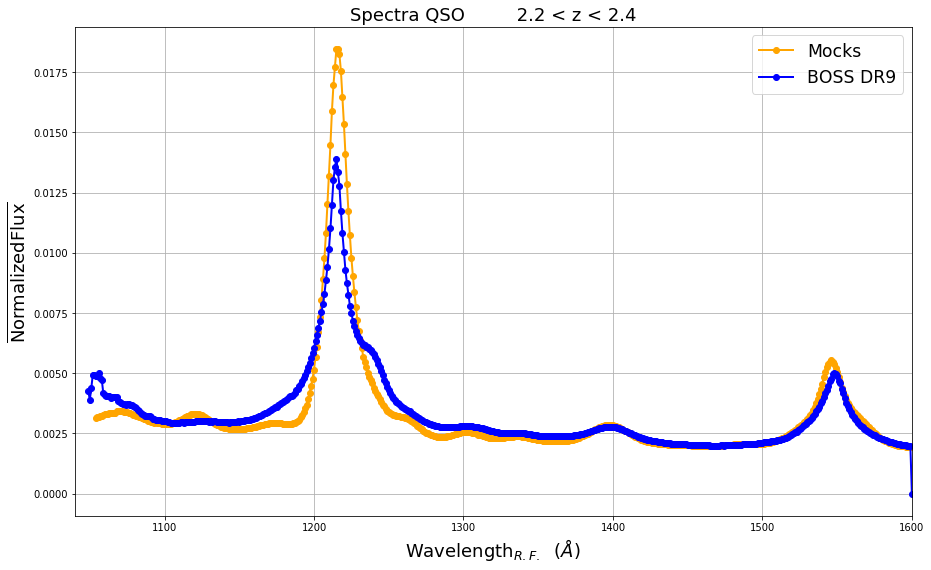

In [81]:
plt.figure(figsize=(15,9))
plt.title('Spectra QSO         2.2 < z < 2.4',fontsize = 18)
plt.plot(xmeanwv2,meanfx2,'o-', color='orange',label='Mocks',linewidth=2.0,alpha=1)
plt.plot(xmean,mean,'o-', color='b',label='BOSS DR9',linewidth=2.0,alpha=1)
#plt.axvline(1216, color = 'k',label=('Ly-$\\alpha$ Peak'),linewidth=2.5,alpha=1)
#plt.axvline(1546, color = 'y',label=('CIV Peak'),linewidth=2.5,alpha=1)
#plt.axvline(1049,linewidth=2.5)
#plt.axhline(0.0022, color = 'g',label=('0.0022'),linewidth=2.5,alpha=1)
plt.xlim(1040,1600)
#plt.ylim(-5,12)
plt.xlabel('Wavelength$_{R.F.}$  ($\AA$)',fontsize = 18)
plt.ylabel(r'$\mathrm{\overline{Normalized Flux}}$',fontsize = 18)#     ($10^{-17} ergs/s/cm^{2}/\AA$)',fontsize = 18)
plt.legend(fontsize='xx-large')
plt.grid()
plt.savefig('mock_vs_boss_2.2-2.4.png')

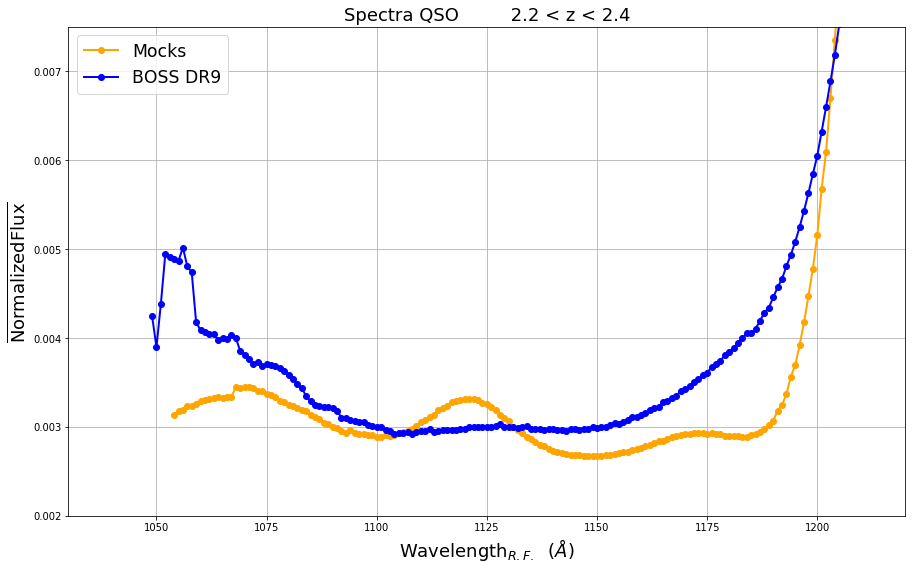

In [82]:
plt.figure(figsize=(15,9))
plt.title('Spectra QSO         2.2 < z < 2.4',fontsize = 18)
plt.plot(xmeanwv2,meanfx2,'o-', color='orange',label='Mocks',linewidth=2.0,alpha=1)
plt.plot(xmean,mean,'o-', color='b',label='BOSS DR9',linewidth=2.0,alpha=1)
#plt.axvline(1216, color = 'k',label=('Ly-$\\alpha$ Peak'),linewidth=2.5,alpha=1)
#plt.axvline(1546, color = 'y',label=('CIV Peak'),linewidth=2.5,alpha=1)
#plt.axvline(1049,linewidth=2.5)
#plt.axhline(0.0022, color = 'g',label=('0.0022'),linewidth=2.5,alpha=1)
plt.xlim(1030,1220)
plt.ylim(0.002,0.0075)
plt.xlabel('Wavelength$_{R.F.}$  ($\AA$)',fontsize = 18)
plt.ylabel(r'$\mathrm{\overline{Normalized Flux}}$',fontsize = 18)#($10^{-17} ergs/s/cm^{2}/\AA$)',fontsize = 18)
plt.legend(fontsize='xx-large')
plt.grid()
#plt.savefig('mock_vs_boss_2.2-2.4_zoom.png')

$\textbf{Now, I will make to other redshift}$

In [84]:
plates2 = []
mjds2 = [] # MJD (Modified Julian date of observation)
fibers2 = []
zss2 = []
prueba2 = []
for i in range(len(fm['Z_VI'])):
    if 2.6 <= fm['Z_VI'][i] < 2.8 :
        plates2.append(fm['PLATE'][i])
        mjds2.append(fm['MJD'][i])
        fibers2.append(fm['FIBERID'][i])
        zss2.append(fm['Z_VI'][i])
        prueba2.append('BOSSLyaDR9_spectra/{}/speclya-{}-{}-{}.fits'.format(fm['PLATE'][i],fm['PLATE'][i],fm['MJD'][i],str(fm['FIBERID'][i]).zfill(4)))

In [85]:
print('long. plates = {} \nlong. mjds = {} \nlong.fibers = {}'.format(len(plates2),len(mjds2),len(fibers2)))

long. plates = 7339 
long. mjds = 7339 
long.fibers = 7339


In [86]:
wave_rf2 = []
continuos2 = []
flujos2 = []
for i in range(100):
    specfile2 = '/home/rodrigo/Documentos/maestria/ultimo_año/datos_boss_dr9/{}'.format(prueba2[i])
    sp2 = fitsio.read(specfile2)
    wave2 = []
    continuo2 = []
    flujo2 = []
    for j in range(len(sp2['FLUX'])):
        wave2.append(10**(sp2['LOGLAM'][j]))
        continuo2.append(sp2['CONT'][j])
        flujo2.append(sp2['FLUX'][j])
    wave_rf2.append(wave2/(1+zss2[i]))
    continuos2.append(continuo2)
    flujos2.append(flujo2)

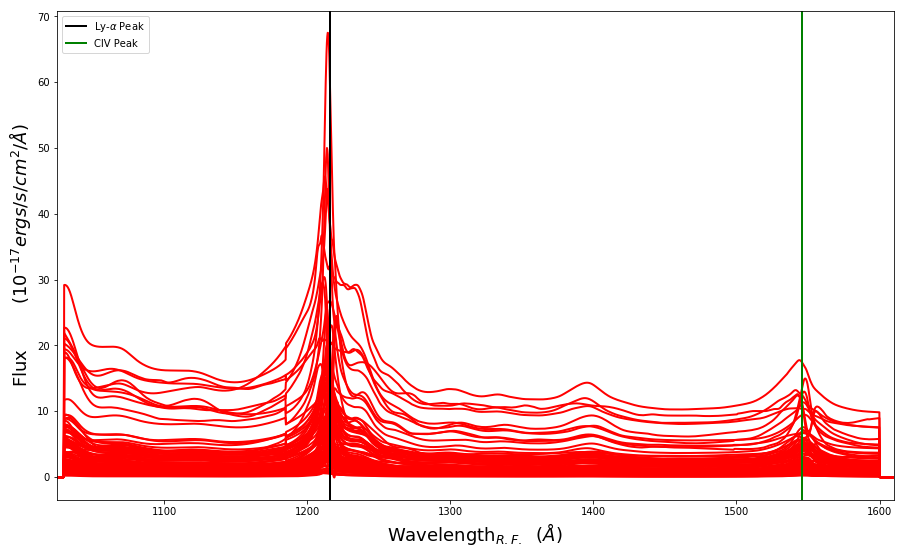

In [107]:
plt.figure(figsize=(15,9))
for k in range(len(wave_rf2)):
    plt.plot(wave_rf2[k],continuos2[k], color='r',linewidth=2.0)
    #plt.plot(wave_rf[k],flujos[k],color='b',linewidth=2.0)
plt.axvline(1216, color = 'k',label=('Ly-$\\alpha$ Peak'),linewidth=2.0)
plt.axvline(1546, color = 'g',label=('CIV Peak'),linewidth=2.0)
#plt.axvline(1030, color = 'g',label=('CIV Peak'),linewidth=2.0)
plt.xlim(1025,1610)
#plt.ylim(-5,12)
plt.xlabel('Wavelength$_{R.F.}$  ($\AA$)',fontsize = 18)
plt.ylabel('Flux        ($10^{-17} ergs/s/cm^{2}/\AA$)',fontsize = 18)
plt.legend()

In [88]:
lmin=1216.0
lmax=1546.0

integral2 = []
continuo_nor2 = []
for i in range(len(wave_rf2)):
    sum1=0
    sum2=0
    flag=0
    for j in range(len(wave_rf2[i])):
        if lmin <= wave_rf2[i][j] < lmax :
            sum1+=(continuos2[i][j])*(wave_rf2[i][j+1]-wave_rf2[i][j])
        elif (wave_rf2[i][j] > lmax):
            break
    integral2.append(sum1)
    continuo_nor2.append(continuos2[i]/sum1)

In [89]:
print('The total integrals = {}'.format(len(integral2)))

The total integrals = 100


In [115]:
count2 = np.zeros(1600-1030+1)
mean2= np.zeros(1600-1030+1)
sumflux2 = np.zeros(1600-1030+1)
for k in range(len(wave_rf2)):
    for l in range(len(wave_rf2[k])):
        if 1030 < wave_rf2[k][l] <= 1601:
            co2 = int(wave_rf2[k][l])-1030
            count2[co2]+=1
            sumflux2[co2]+=continuo_nor2[k][l]
            mean2 = sumflux2/count2

/home/rodrigo/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [116]:
xmean2 = np.linspace(1030,1600,1600-1030+1) 

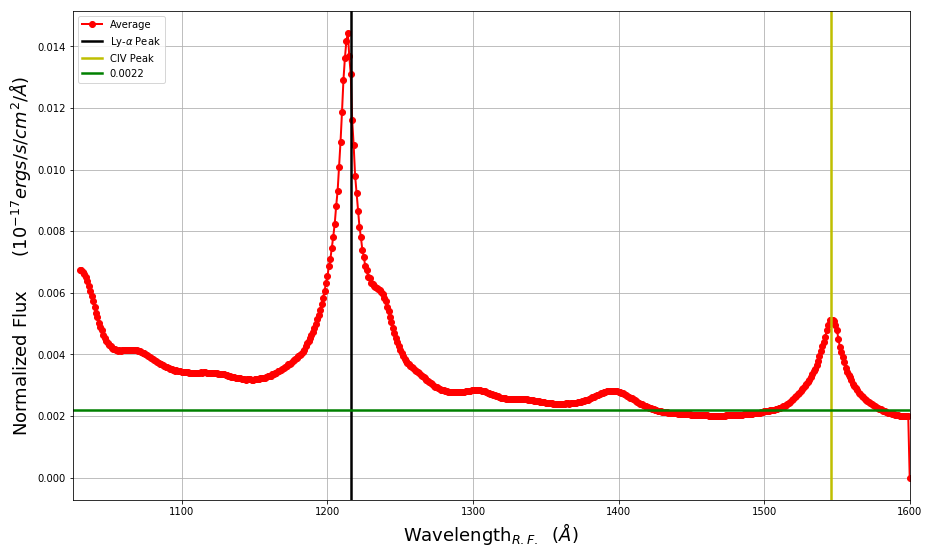

In [117]:
plt.figure(figsize=(15,9))
plt.plot(xmean2,mean2,'o-', color='r',label='Average',linewidth=2.0)
plt.axvline(1216, color = 'k',label=('Ly-$\\alpha$ Peak'),linewidth=2.5)
plt.axvline(1546, color = 'y',label=('CIV Peak'),linewidth=2.5)
#plt.axvline(1049,linewidth=2.5)
plt.axhline(0.0022, color = 'g',label=('0.0022'),linewidth=2.5)
plt.xlim(1025,1600)
#plt.ylim(-5,12)
plt.xlabel('Wavelength$_{R.F.}$  ($\AA$)',fontsize = 18)
plt.ylabel('Normalized Flux      ($10^{-17} ergs/s/cm^{2}/\AA$)',fontsize = 18)
plt.legend()
plt.grid()

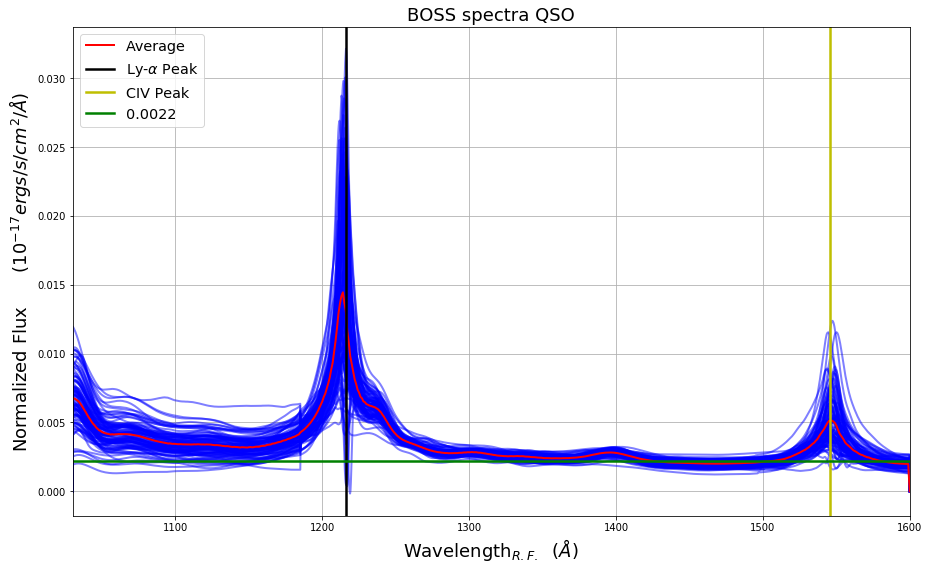

In [118]:
plt.figure(figsize=(15,9))
plt.title('BOSS spectra QSO',fontsize = 18)
for k in range(len(wave_rf)):
    plt.plot(wave_rf2[k],continuo_nor2[k], color='b',linewidth=2.0,alpha=0.5)
plt.plot(xmean2,mean2, color='r',label='Average',linewidth=2.0,alpha=1)
plt.axvline(1216, color = 'k',label=('Ly-$\\alpha$ Peak'),linewidth=2.5,alpha=1)
plt.axvline(1546, color = 'y',label=('CIV Peak'),linewidth=2.5,alpha=1)
#plt.axvline(1049,linewidth=2.5)
plt.axhline(0.0022, color = 'g',label=('0.0022'),linewidth=2.5,alpha=1)
plt.xlim(1030,1600)
#plt.ylim(-5,12)
plt.xlabel('Wavelength$_{R.F.}$  ($\AA$)',fontsize = 18)
plt.ylabel('Normalized Flux      ($10^{-17} ergs/s/cm^{2}/\AA$)',fontsize = 18)
plt.legend(fontsize='x-large')
plt.grid()
plt.savefig('stacking_boss.png')

In [119]:
xmeanwv22,meanfx22=np.loadtxt('mock3.dat',skiprows=2,unpack=True) 

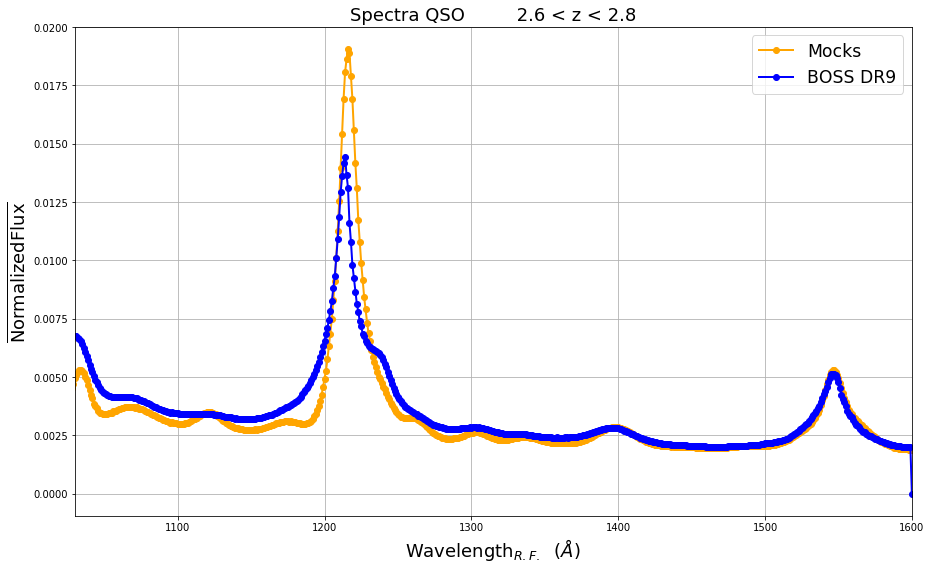

In [120]:
plt.figure(figsize=(15,9))
plt.title('Spectra QSO         2.6 < z < 2.8',fontsize = 18)
plt.plot(xmeanwv22,meanfx22,'o-', color='orange',label='Mocks',linewidth=2.0,alpha=1)
plt.plot(xmean2,mean2,'o-', color='b',label='BOSS DR9',linewidth=2.0,alpha=1)
#plt.axvline(1216, color = 'k',label=('Ly-$\\alpha$ Peak'),linewidth=2.5,alpha=1)
#plt.axvline(1546, color = 'y',label=('CIV Peak'),linewidth=2.5,alpha=1)
#plt.axvline(1049,linewidth=2.5)
#plt.axhline(0.0022, color = 'g',label=('0.0022'),linewidth=2.5,alpha=1)
plt.xlim(1030,1600)
#plt.ylim(-5,12)
plt.xlabel('Wavelength$_{R.F.}$  ($\AA$)',fontsize = 18)
plt.ylabel(r'$\mathrm{\overline{Normalized Flux}}$',fontsize = 18)#     ($10^{-17} ergs/s/cm^{2}/\AA$)',fontsize = 18)
plt.legend(fontsize='xx-large')
plt.grid()

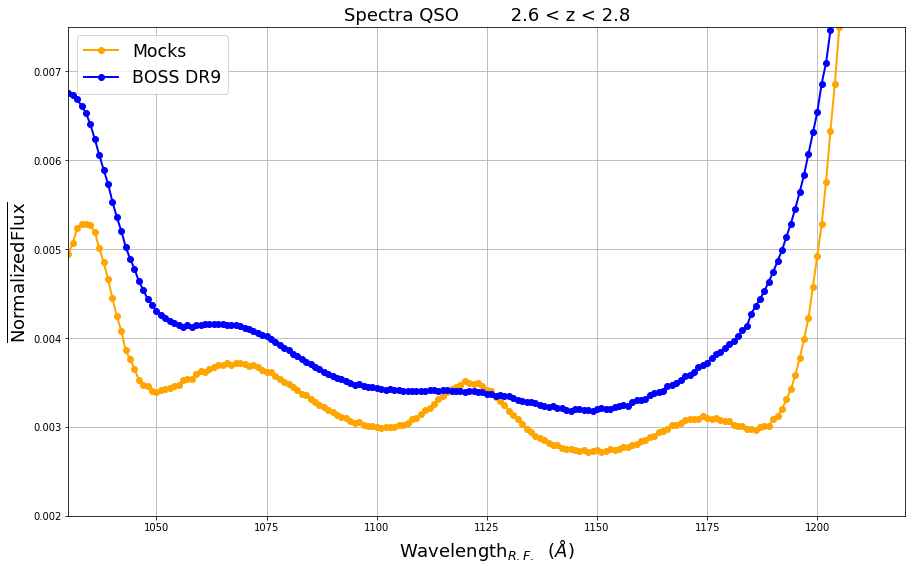

In [121]:
plt.figure(figsize=(15,9))
plt.title('Spectra QSO         2.6 < z < 2.8',fontsize = 18)
plt.plot(xmeanwv22,meanfx22,'o-', color='orange',label='Mocks',linewidth=2.0,alpha=1)
plt.plot(xmean2,mean2,'o-', color='b',label='BOSS DR9',linewidth=2.0,alpha=1)
#plt.axvline(1216, color = 'k',label=('Ly-$\\alpha$ Peak'),linewidth=2.5,alpha=1)
#plt.axvline(1546, color = 'y',label=('CIV Peak'),linewidth=2.5,alpha=1)
#plt.axvline(1049,linewidth=2.5)
#plt.axhline(0.0022, color = 'g',label=('0.0022'),linewidth=2.5,alpha=1)
plt.xlim(1030,1220)
plt.ylim(0.002,0.0075)
plt.xlabel('Wavelength$_{R.F.}$  ($\AA$)',fontsize = 18)
plt.ylabel(r'$\mathrm{\overline{Normalized Flux}}$',fontsize = 18)#($10^{-17} ergs/s/cm^{2}/\AA$)',fontsize = 18)
plt.legend(fontsize='xx-large')
plt.grid()

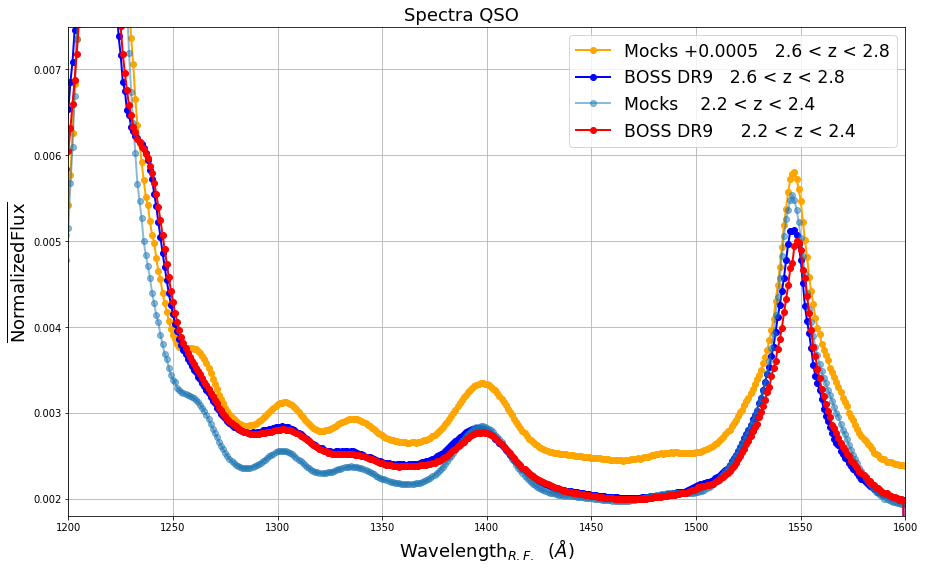

In [125]:
plt.figure(figsize=(15,9))
plt.title('Spectra QSO         ',fontsize = 18) #2.6 < z < 2.8
plt.plot(xmeanwv22,meanfx22+0.0005,'o-', color='orange',label='Mocks +0.0005   2.6 < z < 2.8',linewidth=2.0,alpha=1)
plt.plot(xmean2,mean2,'o-', color='b',label='BOSS DR9   2.6 < z < 2.8',linewidth=2.0,alpha=1)
plt.plot(xmeanwv2,meanfx2,'o-',label='Mocks    2.2 < z < 2.4',linewidth=2.0,alpha=0.5)
plt.plot(xmean,mean,'o-',color='r',label='BOSS DR9     2.2 < z < 2.4',linewidth=2.0,alpha=1)
#plt.axvline(1216, color = 'k',label=('Ly-$\\alpha$ Peak'),linewidth=2.5,alpha=1)
#plt.axvline(1546, color = 'y',label=('CIV Peak'),linewidth=2.5,alpha=1)
#plt.axvline(1049,linewidth=2.5)
#plt.axhline(0.0022, color = 'g',label=('0.0022'),linewidth=2.5,alpha=1)
plt.xlim(1200,1600)
plt.ylim(0.0018,0.0075)
plt.xlabel('Wavelength$_{R.F.}$  ($\AA$)',fontsize = 18)
plt.ylabel(r'$\mathrm{\overline{Normalized Flux}}$',fontsize = 18)#($10^{-17} ergs/s/cm^{2}/\AA$)',fontsize = 18)
plt.legend(fontsize='xx-large')
plt.grid()